# <font style="color:blue">Table of Content</font>

- [Step 1: Understand Your Problem](#step1)
- [Step 2: Get the Data](#step2)
- [Step 3. Data Preparation](#step3)
- [Step 4: Train a Simple Model](#step4)
- [Step 5: Sample Prediction](#step5)
- [Step 6. Display Mistakes](#step6)

# <font style="color:blue">Project 1 - Part 2: Train an Image Classifier From Scratch</font>
As discussed in the previous notebook, the steps for training Neural Networks are:

- Step 1 - Understand your problem
- Step 2A - Get the data
- Step 2B - Explore and understand your data
- Step 2C - Create a sample data from the dataset
- Step 3 - Data preparation
- Step 4 - Train a simple model on sample data and check the pipeline before proceeding to train the full network
- Step 5 - Train on full data
- Step 6 - Improve your model

You have already been through Steps `1-4` in the previous notebook. Use them here as well.

Here, you will implement Steps `5` & `6` from scratch. Design a model that achieves `>=85%` validation accuracy on the given dataset.

There are 70 points for this notebook. The sections which carry marks are in Red.

There are **70 points** for this notebook. <font style="color:red">The sections which carry marks are in Red.</font>

For GPU compute you can use Kaggle Kernels, Google Colab or any other service of your choice.

After completing the assignment, upload and submit it on the portal for feedback.

<font style="color:red">Use the full data to train the network. You need to achieve 85% accuracy for validation data to successfully complete this assignment.</font>


<font style="color:red">Just remember to build your own model, not use any pre-trained models/weights.</font>


Upon completing the assignment, <font style="color:red">upload the notebook and the models folder on the portal for  feedback.</font>

# <font style="color:blue">Step 1: Understand Your problem </font><a name="step1"></a>
Already covered in the previous notebook.

# <font style="color:blue">Step 2: Get the Data </font><a name="step2"></a>

Already covered in the previous notebook.

In [1]:
!wget "https://www.dropbox.com/sh/n5nya3g3airlub6/AACi7vaUjdTA0t2j_iKWgp4Ra?dl=1" -O data.zip

--2024-07-27 15:35:10--  https://www.dropbox.com/sh/n5nya3g3airlub6/AACi7vaUjdTA0t2j_iKWgp4Ra?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fo/t88xubtku433w1t10t7he/AEmJ4AwgZ3Svjp29IdawVbE?rlkey=9vuxo0sqr57tsoqn8wgk9pjzc&dl=1 [following]
--2024-07-27 15:35:10--  https://www.dropbox.com/scl/fo/t88xubtku433w1t10t7he/AEmJ4AwgZ3Svjp29IdawVbE?rlkey=9vuxo0sqr57tsoqn8wgk9pjzc&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucadcf0c1503580dd0d08c49f7ad.dl.dropboxusercontent.com/zip_download_get/B66rcrJVCpM12OrDMFCTh_0oU7dVMJJL7KIhti4s17O9fBNQdOu3zFxOgr-aZpb1w76bU3We6kjzzHABiDFnpauVUc5mXIKiGiGWA6Rp9famiA# [following]
--2024-07-27 15:35:13--  https://ucadcf0c1503580dd0d08c49f7ad.dl.dropboxusercontent.com/zip_

### <font style="color:green">Extract the Data</font>

In [2]:
!unzip -q data.zip

mapname:  conversion of  failed


# <font style="color:blue">Step 3. Data Preparation</font><a name="step3"></a>
Already covered in the previous notebook.

## <font style="color:blue">3.1. Import Libraries </font>

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
import os
import time

from typing import Iterable
from dataclasses import dataclass

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, transforms

from torch.optim import lr_scheduler

In [31]:
!pip install torchmetrics

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [32]:
from torchmetrics.classification import MulticlassConfusionMatrix

### <font style="color:green">3.2.1. Compulsary Preprocessing Transforms</font>

In [6]:
def image_preprocess_transforms():

    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor()
        ])

    return preprocess

### <font style="color:green">3.2.2. Common Image Transforms</font>

In [7]:
def image_common_transforms(mean, std):
    preprocess = image_preprocess_transforms()

    common_transforms = transforms.Compose([
        preprocess,
        transforms.Normalize(mean=[0.4611, 0.4359, 0.3905], std=[0.2193, 0.2150, 0.2109])
    ])

    return common_transforms


### <font style="color:green">3.2.3. Mean and STD</font>

In [8]:
def get_mean_std(data_root, num_workers=4):

    transform = image_preprocess_transforms()

    loader = data_loader(data_root, transform)

    batch_mean = torch.zeros(3)
    batch_mean_sqrd = torch.zeros(3)

    for batch_data, _ in loader:
        batch_mean += batch_data.mean(dim=(0, 2, 3)) # E[batch_i]
        batch_mean_sqrd += (batch_data ** 2).mean(dim=(0, 2, 3)) #  E[batch_i**2]

    # E[dataset] = E[E[batch_1], E[batch_2], ...]
    mean = batch_mean / len(loader)

    # var[X] = E[X**2] - E[X]**2

    # E[X**2] = E[E[batch_1**2], E[batch_2**2], ...]
    # E[X]**2 = E[E[batch_1], E[batch_2], ...] ** 2

    var = (batch_mean_sqrd / len(loader)) - (mean ** 2)

    std = var ** 0.5
    print('mean: {}, std: {}'.format(mean, std))

    return mean, std

## <font style="color:blue">3.3. Data Loaders </font>

### <font style="color:green">3.3.1. Data Loader for Full Data</font>
Data loader for generating batches of data to be used by the training routine

In [9]:
def data_loader(data_root, transform, batch_size=16, shuffle=False, num_workers=2):
    dataset = datasets.ImageFolder(root=data_root, transform=transform)

    loader = torch.utils.data.DataLoader(dataset,
                                         batch_size=batch_size,
                                         num_workers=num_workers,
                                         shuffle=shuffle)

    return loader

## <font style="color:green">3.4. Prepare Data</font>
The main function which uses all the above functions to generate the train and test dataloaders.


In [10]:
def data_augmentation_preprocess(img_size,mean,std):
    train_transforms = transforms.Compose([
            transforms.Resize(img_size,antialias=True),
            transforms.RandomHorizontalFlip(),
            transforms.RandomAffine(degrees=(-0.1, 0.1), translate=(0.1, 0.1), scale=(0.95, 1.05)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
        ])

    return train_transforms

In [11]:
def get_data(batch_size, data_root, img_size=(224, 224), num_workers=4, data_augmentation=True):

    train_data_path = os.path.join(data_root,'training')
    mean,std = get_mean_std(train_data_path)
    common_transforms = data_augmentation_preprocess(img_size, mean, std)

    if data_augmentation:
        train_transforms = data_augmentation_preprocess(img_size,mean,std)
    else:
        train_transforms = common_transforms

    train_loader = data_loader(
        train_data_path,
        shuffle=True,
        batch_size=batch_size,
        num_workers = num_workers,
        transform=train_transforms
    )

    valid_data_path = os.path.join(data_root,'validation')
    valid_loader = data_loader(
        valid_data_path,
        shuffle=False,
        batch_size=batch_size,
        num_workers = num_workers,
        transform = common_transforms
    )

    return train_loader,valid_loader

In [12]:
val_loader = data_loader('/content/cat-dog-panda/validation',transform=None, num_workers=2)
len(val_loader.dataset)

600

In [13]:
#Sanity check
data_root = "/content/cat-dog-panda"
train_data_path = os.path.join(data_root,"training")
print(train_data_path)
get_data(data_root=data_root,batch_size=32, num_workers=2, img_size=(224,224))

/content/cat-dog-panda/training
mean: tensor([0.4610, 0.4347, 0.3897]), std: tensor([0.2734, 0.2641, 0.2616])


(<torch.utils.data.dataloader.DataLoader at 0x7df3b2887820>,
 <torch.utils.data.dataloader.DataLoader at 0x7df3b28875b0>)

# <font style="color:blue">Step 4: Train Your Model</font><a name="step4"></a>

Now, create the training pipeline, and train your model on the full data.

## <font style="color:red">4.1. Configurations [20 Points]</font>

To achieve good results, change the parameters given in these configurations. Score 20 points for all right choices.

### <font style="color:green">4.1.1. System Configuration</font>

Fix the seed (e.g., `21`) to get a reproducible result.

In [14]:
@dataclass
class SystemConfiguration:
    '''
    Describes the common system setting needed for reproducible training
    '''
    seed: int = 21  # seed number to set the state of all random number generators
    cudnn_benchmark_enabled: bool = True  # enable CuDNN benchmark for the sake of performance
    cudnn_deterministic: bool = True  # make cudnn deterministic (reproducible training)

### <font style="color:green">4.1.2. Training Configuration</font>

In [15]:
@dataclass
class TrainingConfiguration:
    '''
    Describes configuration of the training process
    '''
    num_classes: int = 3
    batch_size: int = 32
    img_size: tuple = (224, 224)
    epochs_count: int = 100
    init_learning_rate: float = 1e-4# Initial learning rate
    data_root: str = "/content/cat-dog-panda"
    num_workers: int = 2 #suggested for this GPU P100
    device: str = "cuda"
    scheduler: torch.optim.lr_scheduler = None
    test_interval = 1 # Keeping this as 1 to check validation metrics after each epoch



### <font style="color:green">4.1.3. System Setup</font>

In [16]:
def setup_system(system_config: SystemConfiguration) -> None:
    torch.manual_seed(system_config.seed)
    if torch.cuda.is_available():
        torch.backends.cudnn_benchmark_enabled = system_config.cudnn_benchmark_enabled
        torch.backends.cudnn.deterministic = system_config.cudnn_deterministic

## <font style="color:blue">4.2. Training Function</font>

You are already familiar with the training function. No changes needed here.

In [17]:
def train(
    train_config: TrainingConfiguration, model: nn.Module, optimizer: torch.optim.Optimizer,
    train_loader: torch.utils.data.DataLoader, epoch_idx: int
) -> None:

    # change model in training mood
    model.train()

    # to get batch loss
    batch_loss = np.array([])

    # to get batch accuracy
    batch_acc = np.array([])

    for batch_idx, (data, target) in enumerate(train_loader):

        # clone target
        indx_target = target.clone()
        # send data to device (its is medatory if GPU has to be used)
        data = data.to(train_config.device)
        # send target to device
        target = target.to(train_config.device)

        # reset parameters gradient to zero
        optimizer.zero_grad()

        # forward pass to the model
        output = model(data)

        # cross entropy loss
        loss = F.cross_entropy(output, target)

        # find gradients w.r.t training parameters
        loss.backward()
        # Update parameters using gardients
        optimizer.step()

        batch_loss = np.append(batch_loss, [loss.item()])

        # Score to probability using softmax
        prob = F.softmax(output, dim=1)

        # get the index of the max probability
        pred = prob.data.max(dim=1)[1]

        # correct prediction
        correct = pred.cpu().eq(indx_target).sum()

        # accuracy
        acc = float(correct) / float(len(data))

        batch_acc = np.append(batch_acc, [acc])

    epoch_loss = batch_loss.mean()
    epoch_acc = batch_acc.mean()
    print('Epoch: {} \nTrain Loss: {:.6f} Acc: {:.4f}'.format(epoch_idx, epoch_loss, epoch_acc))
    return epoch_loss, epoch_acc

## <font style="color:blue">4.3. Validation Function</font>

In [18]:
def validate(
    train_config: TrainingConfiguration,
    model: nn.Module,
    test_loader: torch.utils.data.DataLoader,
) -> float:
    #
    model.eval()
    test_loss = 0
    count_corect_predictions = 0
    for data, target in test_loader:
        indx_target = target.clone()
        data = data.to(train_config.device)

        target = target.to(train_config.device)

        with torch.no_grad():
            output = model(data)

        # add loss for each mini batch
        test_loss += F.cross_entropy(output, target).item()

        # Score to probability using softmax
        prob = F.softmax(output, dim=1)

        # get the index of the max probability
        pred = prob.data.max(dim=1)[1]

        # add correct prediction count
        count_corect_predictions += pred.cpu().eq(indx_target).sum()

    # average over number of mini-batches
    test_loss = test_loss / len(test_loader)

    # average over number of dataset
    accuracy = 100. * count_corect_predictions / len(test_loader.dataset)

    print(
        '\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, count_corect_predictions, len(test_loader.dataset), accuracy
        )
    )

    return test_loss, accuracy/100.0

## <font style="color:blue">4.4. Save the Model</font>

In [19]:
def save_model(model, device, model_dir='models', model_file_name='cat_dog_panda_classifier.pt'):


    if not os.path.exists(model_dir):
        os.makedirs(model_dir)

    model_path = os.path.join(model_dir, model_file_name)

    # make sure you transfer the model to cpu.
    if device == 'cuda':
        model.to('cpu')

    # save the state_dict
    torch.save(model.state_dict(), model_path)

    if device == 'cuda':
        model.to('cuda')

    return

## <font style="color:blue">4.5. Load the Model</font>

In [20]:
def load_model(model, model_dir='models', model_file_name='cat_dog_panda_classifier.pt'):
    model_path = os.path.join(model_dir, model_file_name)

    # loading the model and getting model parameters by using load_state_dict
    model.load_state_dict(torch.load(model_path))

    return model

## <font style="color:blue">4.6. Main Function for Training</font>

Note: Before calling the train function, we calculate the validation loss, which we know should be close to $\log(\text{num_classes})$. Also, the accuracy should be close to $\frac{1}{\text{num_classes}}$.

In [21]:
def main(model, optimizer, scheduler=None, system_configuration=SystemConfiguration(),
         training_configuration=TrainingConfiguration(), data_augmentation=True):

    # system configuration
    setup_system(system_configuration)

    # batch size
    batch_size_to_set = training_configuration.batch_size
    # num_workers
    num_workers_to_set = training_configuration.num_workers
    # epochs
    epoch_num_to_set = training_configuration.epochs_count

    # if GPU is available use training config,
    # else lowers batch_size, num_workers and epochs count
    if torch.cuda.is_available():
        device = "cuda"
    else:
        device = "cpu"
        batch_size_to_set = 16
        num_workers_to_set = 4

    # data loader
    train_loader, test_loader = get_data(
        batch_size=batch_size_to_set,
        data_root=training_configuration.data_root,
        num_workers=num_workers_to_set,
        data_augmentation=data_augmentation
    )

    # Update training configuration
    training_configuration = TrainingConfiguration(
        device=device,
        batch_size=batch_size_to_set,
        num_workers=num_workers_to_set
    )

    # send model to device (GPU/CPU)
    model.to(training_configuration.device)

    best_loss = torch.tensor(np.inf)

    # epoch train/test loss
    epoch_train_loss = np.array([])
    epoch_test_loss = np.array([])

    # epch train/test accuracy
    epoch_train_acc = np.array([])
    epoch_test_acc = np.array([])

    # Calculate Initial Test Loss
    init_val_loss, init_val_accuracy = validate(training_configuration, model, test_loader)
    print("Initial Test Loss : {:.6f}, \nInitial Test Accuracy : {:.3f}%\n".format(init_val_loss,
                                                                                   init_val_accuracy*100))

    # trainig time measurement
    t_begin = time.time()
    for epoch in range(training_configuration.epochs_count):

        # Train
        train_loss, train_acc = train(training_configuration, model, optimizer, train_loader, epoch)

        epoch_train_loss = np.append(epoch_train_loss, [train_loss])

        epoch_train_acc = np.append(epoch_train_acc, [train_acc])

        elapsed_time = time.time() - t_begin
        speed_epoch = elapsed_time / (epoch + 1)
        speed_batch = speed_epoch / len(train_loader)
        eta = speed_epoch * training_configuration.epochs_count - elapsed_time

        print(
            "Elapsed {:.2f}s, {:.2f} s/epoch, {:.2f} s/batch, ets {:.2f}s".format(
                elapsed_time, speed_epoch, speed_batch, eta
            )
        )

        # Validate
        if epoch % training_configuration.test_interval == 0:
            current_loss, current_accuracy = validate(training_configuration, model, test_loader)

            epoch_test_loss = np.append(epoch_test_loss, [current_loss])

            epoch_test_acc = np.append(epoch_test_acc, [current_accuracy])

            if current_loss < best_loss:
                best_loss = current_loss
                print('Model Improved. Saving the Model...\n')
                save_model(model, device=training_configuration.device)


    print("Total time: {:.2f}, Best Loss: {:.3f}".format(time.time() - t_begin, best_loss))

    return model, epoch_train_loss, epoch_train_acc, epoch_test_loss, epoch_test_acc

## <font style="color:blue">4.7. Plot Loss and Accuracy</font>

In [22]:
def plot_loss_accuracy(train_loss, val_loss, train_acc, val_acc, colors,
                       loss_legend_loc='upper center', acc_legend_loc='upper left',
                       fig_size=(20, 10), sub_plot1=(1, 2, 1), sub_plot2=(1, 2, 2)):

    plt.rcParams["figure.figsize"] = fig_size
    fig = plt.figure()

    plt.subplot(sub_plot1[0], sub_plot1[1], sub_plot1[2])

    for i in range(len(train_loss)):
        x_train = range(len(train_loss[i]))
        x_val = range(len(val_loss[i]))

        min_train_loss = train_loss[i].min()

        min_val_loss = val_loss[i].min()

        plt.plot(x_train, train_loss[i], linestyle='-', color='tab:{}'.format(colors[i]),
                 label="TRAIN LOSS ({0:.4})".format(min_train_loss))
        plt.plot(x_val, val_loss[i], linestyle='--' , color='tab:{}'.format(colors[i]),
                 label="VALID LOSS ({0:.4})".format(min_val_loss))

    plt.xlabel('epoch no.')
    plt.ylabel('loss')
    plt.legend(loc=loss_legend_loc)
    plt.title('Training and Validation Loss')

    plt.subplot(sub_plot2[0], sub_plot2[1], sub_plot2[2])

    for i in range(len(train_acc)):
        x_train = range(len(train_acc[i]))
        x_val = range(len(val_acc[i]))

        max_train_acc = train_acc[i].max()

        max_val_acc = val_acc[i].max()

        plt.plot(x_train, train_acc[i], linestyle='-', color='tab:{}'.format(colors[i]),
                 label="TRAIN ACC ({0:.4})".format(max_train_acc))
        plt.plot(x_val, val_acc[i], linestyle='--' , color='tab:{}'.format(colors[i]),
                 label="VALID ACC ({0:.4})".format(max_val_acc))

    plt.xlabel('epoch no.')
    plt.ylabel('accuracy')
    plt.legend(loc=acc_legend_loc)
    plt.title('Training and Validation Accuracy')

    fig.savefig('sample_loss_acc_plot.png')
    plt.show()

    return

## <font style="color:red">4.8. Define Model [20 Points]</font>

Next, define the CNN model. Keep iterating. Do this by training various models. Just ,change the :
    
- number of layers
- parameters inside the layers
- different types of layers

In [23]:
from torchvision.ops import Conv2dNormActivation
class MyModel(nn.Module):
    def __init__(self, in_channels=3, num_classes=3,
                 spatial_dropout_rate=0.3, dropout_rate=0.4):
        super().__init__()

        layers = []

        layers.extend([
            Conv2dNormActivation(in_channels=in_channels, out_channels=32, kernel_size=7, padding='same'),#220
            Conv2dNormActivation(in_channels=32, out_channels=64, kernel_size=5, padding='same'),#216

            nn.MaxPool2d(kernel_size=2),#108

            Conv2dNormActivation(in_channels=64, out_channels=128, kernel_size=3, padding='same'),#108


            Conv2dNormActivation(in_channels=128, out_channels=256, kernel_size=3, padding='same'),#108
            nn.MaxPool2d(kernel_size=2),#54
            Conv2dNormActivation(in_channels=256, out_channels=256, kernel_size=5, padding='same'),#54
            Conv2dNormActivation(in_channels=256, out_channels=512, kernel_size=3, padding='same'),#52

            nn.MaxPool2d(kernel_size=2),#26

            Conv2dNormActivation(in_channels=512, out_channels=256, kernel_size=3, padding='same'),#26
            Conv2dNormActivation(in_channels=256,out_channels=256,kernel_size=3,padding="same"),#26
            nn.Dropout2d(p=spatial_dropout_rate),
            nn.MaxPool2d(kernel_size=2),#13

        ])


        layers.extend([
            # # Global Average pooling layer is used.
            nn.AdaptiveAvgPool2d(output_size=(3, 3)),
            nn.Flatten(),

            nn.Linear(in_features=256*9, out_features=2048),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout_rate),

            nn.Linear(in_features=2048 ,out_features=512),
            nn.ReLU(inplace=True),


            nn.Linear(in_features=512, out_features=3),
        ])

        self._model = nn.Sequential(*layers)


    def forward(self, x):
        return self._model(x)

## <font style="color:red">4.9. Training [20 Points]</font>

Experiment with:

- Optimizers and learning rate schedulers \[You can  get good results even without a learning rate scheduler\]

- Regularization techniques like Data Augmentation, Dropout, BatchNorm

In [24]:
model = MyModel()
print(model)

# get optimizer
train_config = TrainingConfiguration()

### CHANGE HERE ###

# optimizer
optimizer = optim.Adam(
    model.parameters(),
    lr = train_config.init_learning_rate

)

MyModel(
  (_model): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(7, 7), stride=(1, 1), padding=same, bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Conv2dNormActivation(
      (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=same, bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2dNormActivation(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (4): Conv2dNormActivation(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
      (1): BatchNorm2d(256,

In [25]:
# train and validate
model, train_loss, train_acc, val_loss, val_acc = main(model, optimizer, scheduler=None, data_augmentation=True)

mean: tensor([0.4610, 0.4347, 0.3897]), std: tensor([0.2734, 0.2641, 0.2616])

Test set: Average loss: 1.0989, Accuracy: 200/600 (33%)

Initial Test Loss : 1.098869, 
Initial Test Accuracy : 33.333%

Epoch: 0 
Train Loss: 0.800562 Acc: 0.5892
Elapsed 40.35s, 40.35 s/epoch, 0.54 s/batch, ets 3994.45s

Test set: Average loss: 0.8387, Accuracy: 350/600 (58%)

Model Improved. Saving the Model...

Epoch: 1 
Train Loss: 0.649359 Acc: 0.6667
Elapsed 85.35s, 42.68 s/epoch, 0.57 s/batch, ets 4182.30s

Test set: Average loss: 0.6684, Accuracy: 394/600 (66%)

Model Improved. Saving the Model...

Epoch: 2 
Train Loss: 0.615847 Acc: 0.6917
Elapsed 129.73s, 43.24 s/epoch, 0.58 s/batch, ets 4194.51s

Test set: Average loss: 0.8435, Accuracy: 390/600 (65%)

Epoch: 3 
Train Loss: 0.582211 Acc: 0.7058
Elapsed 174.12s, 43.53 s/epoch, 0.58 s/batch, ets 4178.98s

Test set: Average loss: 0.6157, Accuracy: 430/600 (72%)

Model Improved. Saving the Model...

Epoch: 4 
Train Loss: 0.547176 Acc: 0.7325
Elapsed 

## <font style="color:blue">4.10. Loss and Accuracy Plot</font>

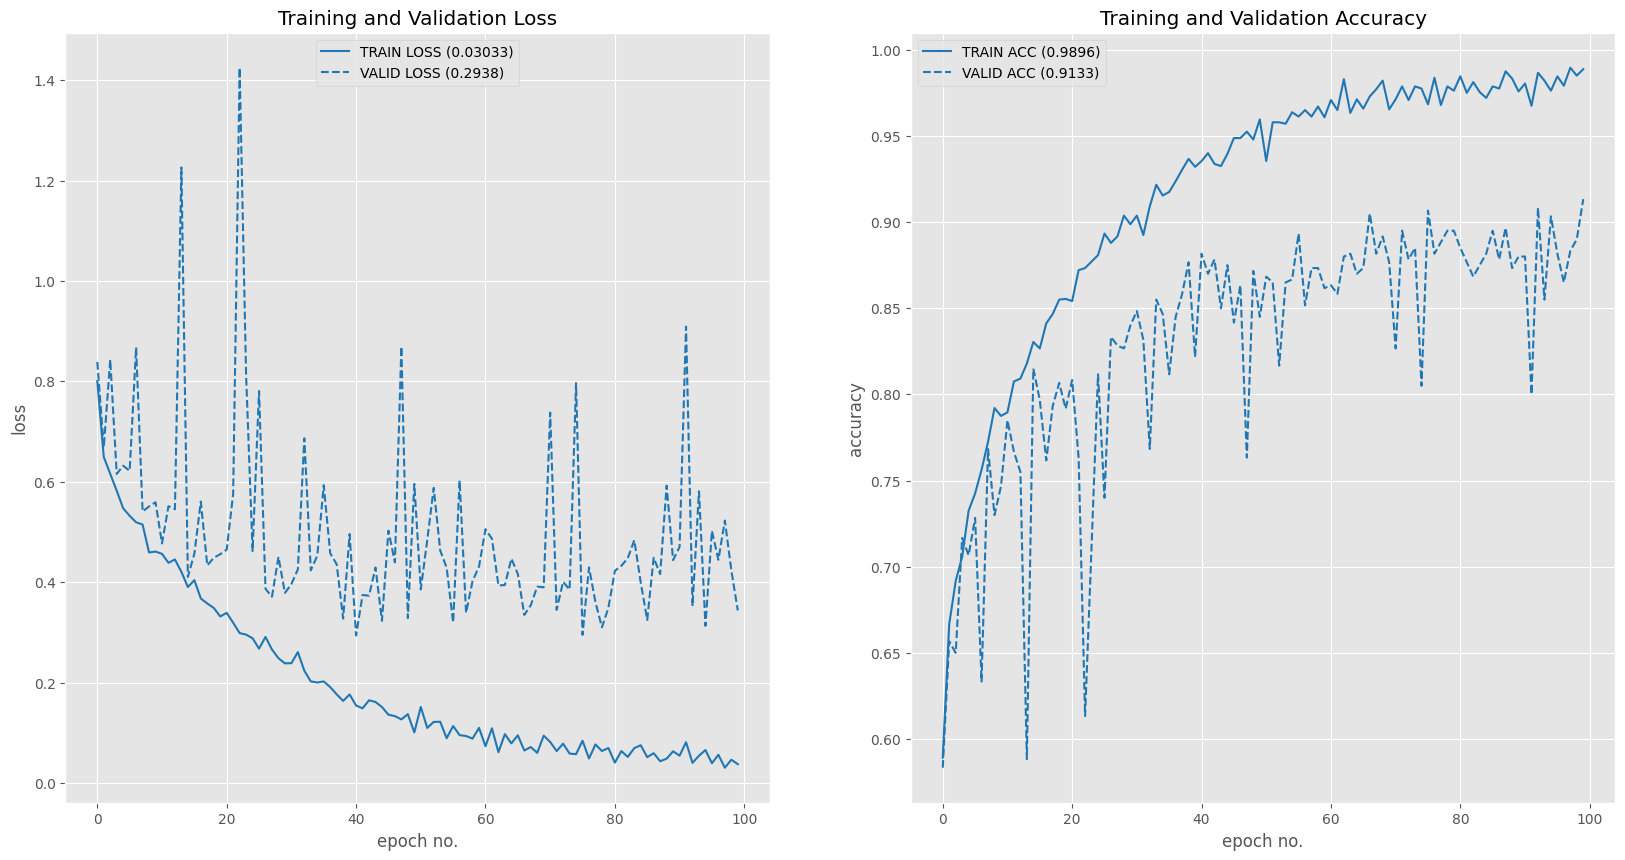

In [26]:
plot_loss_accuracy(train_loss=[train_loss],
                   val_loss=[val_loss],
                   train_acc=[train_acc],
                   val_acc=[val_acc],
                   colors=['blue'],
                   loss_legend_loc='upper center',
                   acc_legend_loc='upper left')

# <font style="color:blue">Step 5. Sample Prediction</font><a name="step5"></a>

Show some sample predictions.

## <font style="color:blue">5.1. Make Predictions</font>

In [27]:
def prediction(model, device, batch_input):

    data = batch_input.to(device)

    with torch.no_grad():
        output = model(data)

    # Score to probability using softmax
    prob = F.softmax(output, dim=1)

    # get the max probability
    pred_prob = prob.data.max(dim=1)[0]

    # get the index of the max probability
    pred_index = prob.data.max(dim=1)[1]

    return pred_index.cpu().numpy(), pred_prob.cpu().numpy()

## <font style="color:blue">5.2. Get Predictions on a Batch</font>

In [28]:
def get_sample_prediction(model, data_root, img_size, mean, std):
    batch_size = 32

    if torch.cuda.is_available():
        device = "cuda"
        num_workers = 8
    else:
        device = "cpu"
        num_workers = 2

    # It is important to do model.eval() before prediction.
    model.eval()

    # Send model to cpu/cuda according to your system configuration.
    model.to(device)

    # Transformed data
    valid_dataset_trans = datasets.ImageFolder(root=data_root, transform=image_common_transforms(mean, std))

    # Original image dataset
    valid_dataset = datasets.ImageFolder(root=data_root, transform=image_preprocess_transforms())

    data_len = valid_dataset.__len__()

    # interval = int(data_len / batch_size)

    imgs = []
    cls_pred = []
    targets = []
    for i in range(0, data_len, batch_size):
        batch_imgs = []
        batch_inputs = []
        batch_targets = []
        for j_index in range(i, min(i + batch_size, data_len)):
            trans_input, target = valid_dataset_trans.__getitem__(j_index)
            img, _ = valid_dataset.__getitem__(j_index)

            batch_imgs.append(img)
            batch_inputs.append(trans_input)
            batch_targets.append(target)
        batch_inputs = torch.stack(batch_inputs)
        batch_imgs = torch.stack(batch_imgs)
        batch_cls, batch_prob = prediction(model, device, batch_input=batch_inputs)

        imgs.extend(batch_imgs)
        cls_pred.extend(batch_cls)
        targets.extend(batch_targets)

    # cls, prob = prediction(model, device, batch_input=inputs)

    plt.style.use("default")
    plt.rcParams["figure.figsize"] = (15, 9)
    fig = plt.figure()

    num_samples_to_plot = min(len(targets), 15)

    for i in range(num_samples_to_plot):
        # print(f"Processing sample {i}")
        plt.subplot(3, 5, i + 1)
        img = transforms.functional.to_pil_image(imgs[i])
        plt.imshow(img)
        if i < len(cls_pred) and i < len(batch_prob) and i < len(targets):
            plt.gca().set_title(f"P:{valid_dataset.classes[cls_pred[i]]}({batch_prob[i]:.2}), T:{valid_dataset.classes[targets[i]]}")
        else:
            # print("Index out of range")
            continue
    plt.show()

    return cls_pred, targets

## <font style="color:blue">5.3. Load Model and Run Inference</font>

mean: tensor([0.4610, 0.4347, 0.3897]), std: tensor([0.2734, 0.2641, 0.2616])


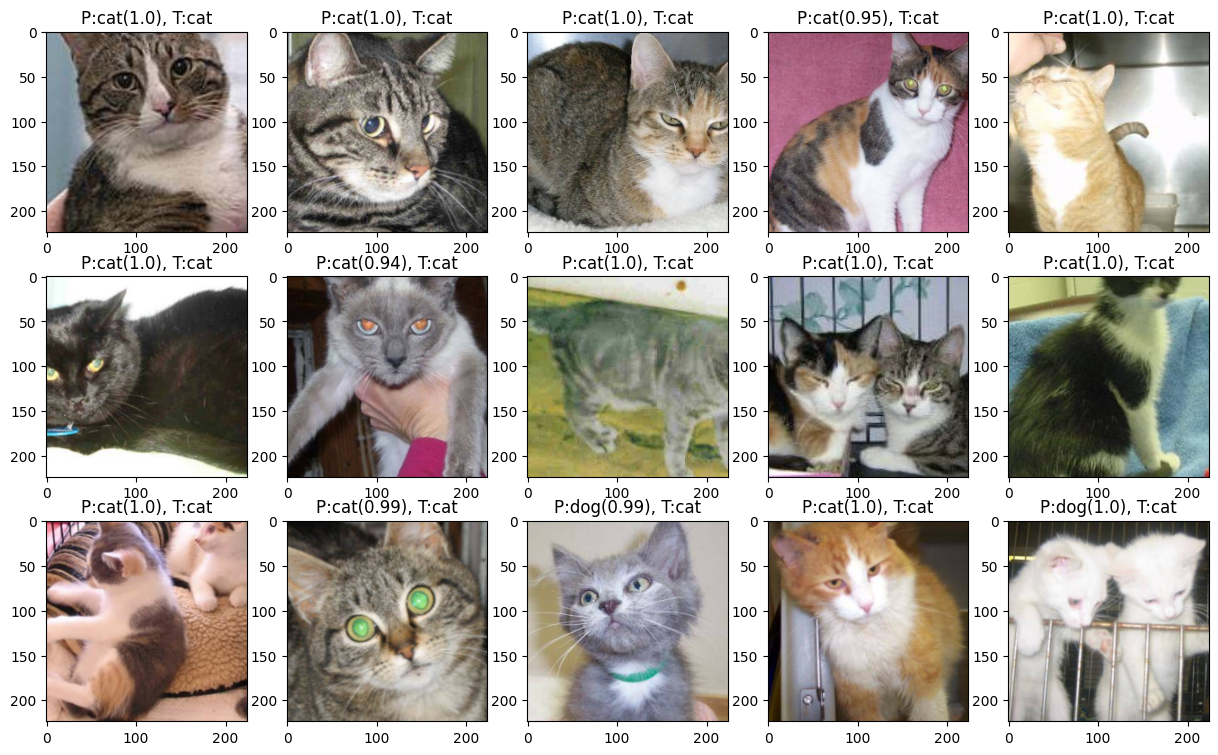

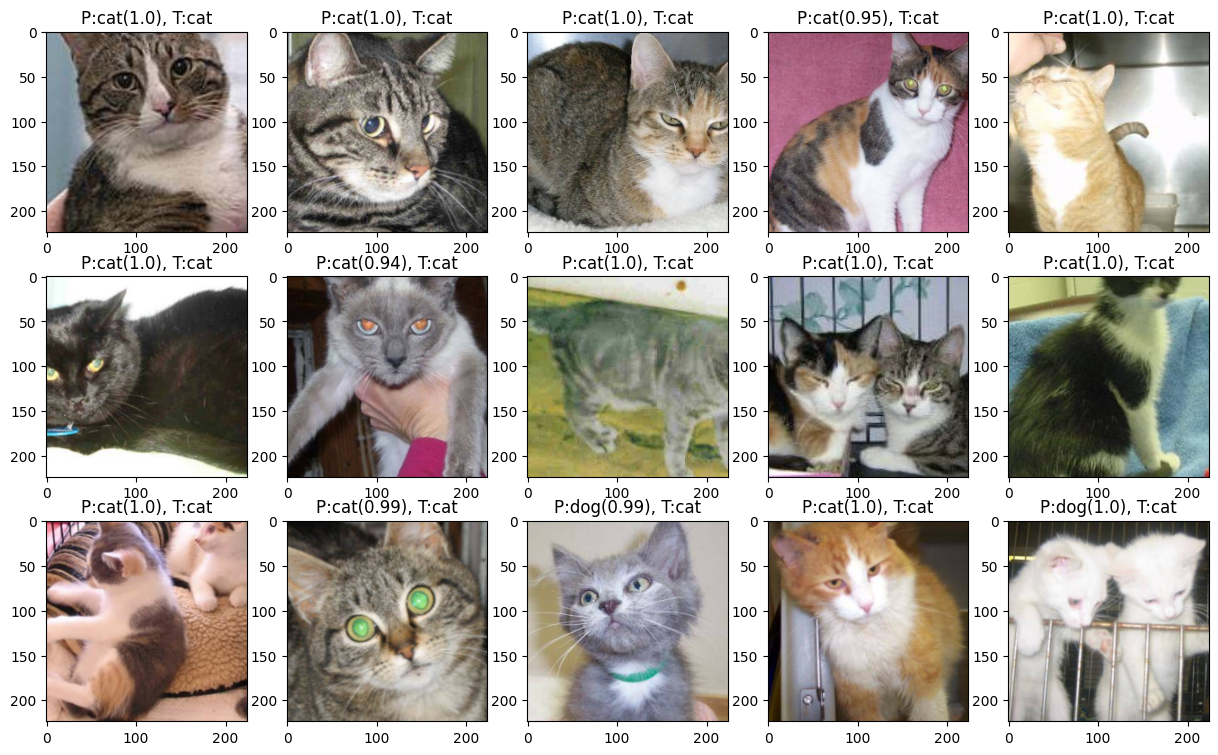

In [30]:
m = MyModel()
m = load_model(m)

train_config = TrainingConfiguration()

train_data_path = os.path.join(train_config.data_root, 'training')
valid_data_path = os.path.join(train_config.data_root, 'validation')


mean, std = get_mean_std(train_data_path)

get_sample_prediction(m, valid_data_path, train_config.img_size, mean, std)

training_config = TrainingConfiguration()
cls_pred,targets = get_sample_prediction(m, valid_data_path, img_size=training_config.img_size, mean=mean, std=std)
cls_pred_tensor = torch.tensor(cls_pred,dtype=torch.float32)
targets_tensor = torch.tensor(targets)

# <font style="color:red">Step 6. Display Confusion Matrix [10 Points]</font><a name="step6"></a>

Display the confusion matrix for the above problem(Refer to the earlier lectures on Performance Metrics).


The output should resemble this:

<img src='https://www.learnopencv.com/wp-content/uploads/2020/02/c3_w5_sample_confusion_matrix.png' width=600>


AxesImage(size=(3, 3))


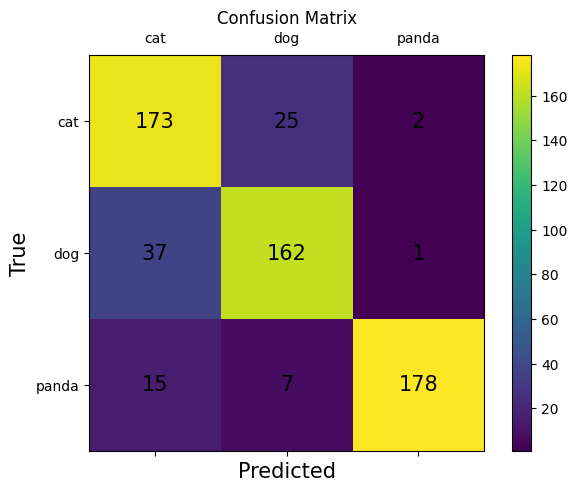

In [33]:
# YOUR CODE HERE

# Initialize confusion matrix
cm = MulticlassConfusionMatrix(num_classes=3)

# Update confusion matrix with predictions and targets
cm.update(cls_pred_tensor, targets_tensor)

# Plot confusion matrix with color bar
fig_, ax_ = cm.plot(add_text=True, labels=["cat", "dog", "panda"])

# Add title
ax_.set_title('Confusion Matrix')

# Set x-axis label
ax_.set_xlabel('Predicted')

# Set y-axis label
ax_.set_ylabel('True')

plt.yticks(rotation=0)

plt.xticks(rotation=0)


# Move x-axis ticks to the top
ax_.tick_params(axis='x',labelbottom=False, labeltop=True,rotation=0)


# Add color bar to the plot
cbar = fig_.colorbar(ax_.images[0], ax=ax_)

print(ax_.images[0])



plt.show()

Upon completing the assignment,  <font style="color:red">pload the 2 notebooks and the models folder on the portal for feedback.</font>